<a href="https://colab.research.google.com/github/nklsrmy/CCDEPLRL_EXERCISES_COM222ML/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [3]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [4]:
print(dataset)

                                                 review  rating
0                       sir okay armygreen shorts nice        5
1     di pareha yong mga size nila may sobrang liit ...       5
2     super worth it ang ganda Sombra grabi order na...       5
3                                      ganda po salamat       5
4                   maayos pagkadeliver maganda den sya       5
...                                                 ...     ...
996   manipis siya masyado, tapos 9pcs lang yung isa...       2
997   maluwang and sobrang nipis. maluwang and sobra...       2
998   hope hindi tayo manloloko di ba???sa dami ng n...       2
999   Nakaka disappointed lng ng sobra sa seller .. ...       2
1000  salamat po sa courier pero Yung items po nakak...       1

[1001 rows x 2 columns]


In [5]:
dataset['rating'] = dataset.apply(lambda row: 1 if row['rating'] >= 3 else 0, axis=1)

sentences = dataset['review'].tolist()
labels = dataset['rating'].tolist()

training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## 1. Tokenize the data

In [6]:
# answer here
dataset['rating']=dataset['rating'].apply(lambda x: 1 if x>=3 else 0)

In [7]:
vocab_size = 4000
embedding_dim = 256
max_length = 95
trunc_type='post'
padding_type='post'
oov_tok = ""

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [8]:
len(word_index)

3131

## 2. Sequence the data

In [9]:
# answer here
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

## 3. Pad the data

In [10]:
# answer here
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## 4. Train a sentiment model

In [11]:
# answer here
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# answer here
num_epochs = 50
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.6729 - loss: 0.6502 - val_accuracy: 0.3234 - val_loss: 1.0260
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7011 - loss: 0.6097 - val_accuracy: 0.3234 - val_loss: 0.9158
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6954 - loss: 0.6113 - val_accuracy: 0.3234 - val_loss: 0.8008
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6820 - loss: 0.6077 - val_accuracy: 0.3234 - val_loss: 0.8818
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6769 - loss: 0.5750 - val_accuracy: 0.3234 - val_loss: 0.8742
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7600 - loss: 0.4726 - val_accuracy: 0.4179 - val_loss: 0.7562
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8685 - loss: 0.3614 - val_accuracy: 0.4428 - val_loss: 0.8767
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8632 - loss: 0.3080 - val_accuracy: 0.7612 - val_loss

## Get files for visualing the network

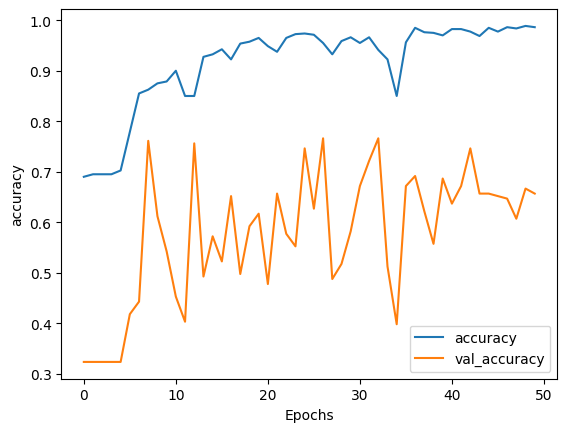

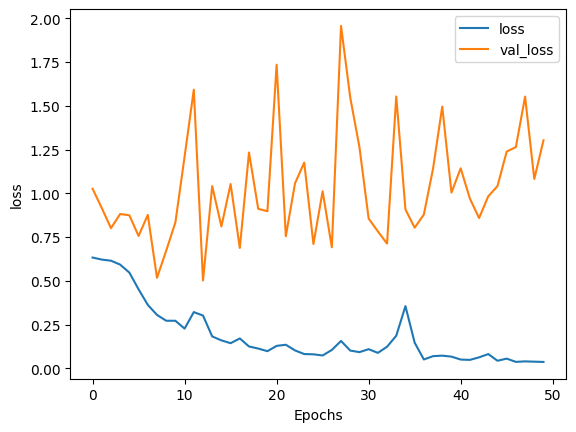

In [13]:
# answer here
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## 5. Predict sentiment with new reviews

In [14]:
# answer here
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(4000, 256)


In [15]:
import io

reverse = dict([(value, key) for (key, value) in word_index.items()])

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Iterate through the actual word indices, excluding the OOV token (index 1)
# up to the number of unique words found in the training data.
for word_num in range(2, len(word_index) + 1):
  # Check if the word_num is a valid key in the reverse dictionary
  if word_num in reverse:
      word = reverse[word_num]
      embeddings = weights[word_num]
      out_m.write(word + "\n")
      out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [16]:
sample_reviews = ['saks lang', 'ang pangit nung damit', 'bakit ang ganda nito pero okay lang naman', 'ang ganda ng seller']

print(sample_reviews)

padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

classes = model.predict(sample_padded)

for x in range(len(sample_reviews)):
  print(sample_reviews[x])
  print(classes[x])
  print('\n')

['saks lang', 'ang pangit nung damit', 'bakit ang ganda nito pero okay lang naman', 'ang ganda ng seller']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
saks lang
[0.6510656]


ang pangit nung damit
[0.6590772]


bakit ang ganda nito pero okay lang naman
[0.9653286]


ang ganda ng seller
[0.95251]


